In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  

In [2]:
data=pd.read_csv('ml_problems_12_creditcard_train.csv')
test_data=pd.read_csv('ml_problems_12_creditcard_test.csv')

In [3]:
data.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
test_data.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99
1,17,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,...,-0.047021,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89
2,18,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80
3,20,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,...,-0.138334,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71
4,27,23,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,...,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00


In [5]:
data['Class'].value_counts()
# need downsample
num_good=data['Class'].value_counts()[0]
num_bad=data['Class'].value_counts()[1]

num_good_percentage=data['Class'].value_counts(normalize=True)[0]
num_bad_percentage=data['Class'].value_counts(normalize=True)[1]

print(data['Class'].value_counts(normalize=True),
      'good=',num_good,'bad=',num_bad)

0    0.998266
1    0.001734
Name: Class, dtype: float64 good= 227394 bad= 395


In [6]:
data=data.drop(['Id'],axis=1)


In [7]:
data.isnull().sum()
#no data filter needed. 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#downsample :
good_rows=data[data['Class']==0].sample(frac=num_bad_percentage/num_good_percentage,random_state=33)

In [9]:
data_balanced=pd.concat([good_rows, data[data['Class']==1]],axis=0)

In [10]:
data_balanced=data_balanced.sample(frac=1)


# investigate features. 
V1-28 选择需要的特征

In [11]:
#sns.pairplot(data_balanced)

In [12]:
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


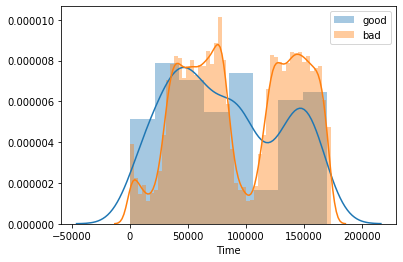

In [13]:
# time vs class
sns.distplot(data[data['Class']==1]['Time'], label= 'good')
sns.distplot(data[data['Class']==0]['Time'], label='bad')
plt.legend()

# tims is sensitive. good feature to keep. 

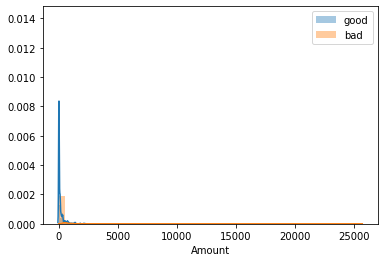

In [14]:
# amoutn vs class
sns.distplot(data[data['Class']==1]['Amount'], label= 'good')
sns.distplot(data[data['Class']==0]['Amount'], label='bad')
plt.legend()

In [15]:
data.columns[1]


'V1'

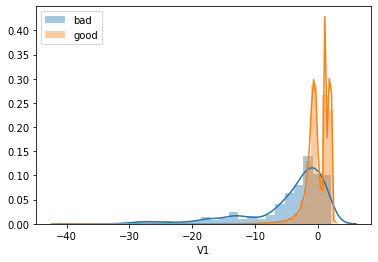

In [16]:
sns.distplot(data[data['Class']==1][data.columns[1]],label='bad')
sns.distplot(data[data['Class']==0][data.columns[1]],label='good')
plt.legend()
plt.show()

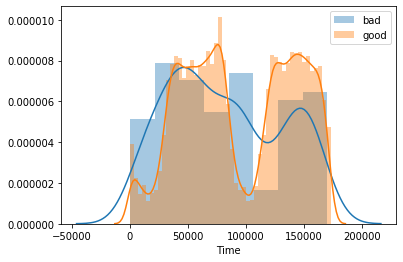

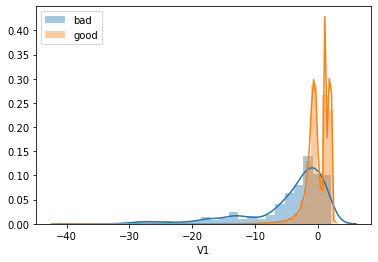

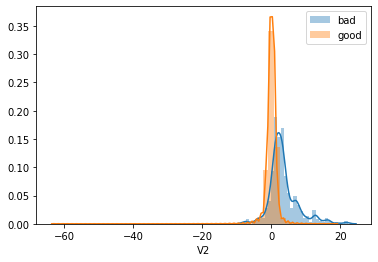

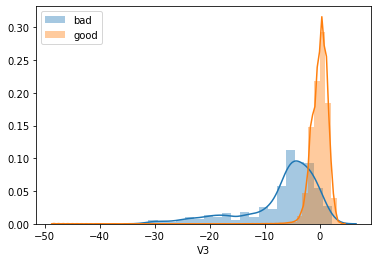

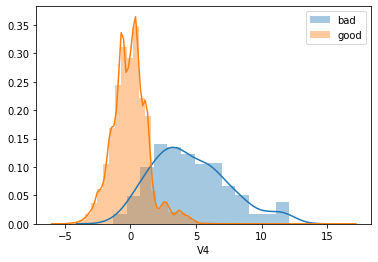

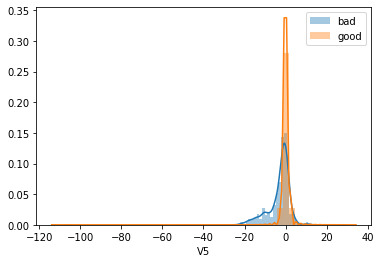

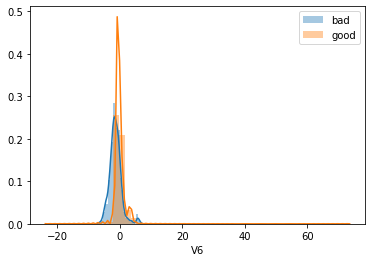

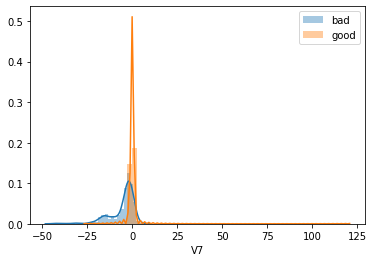

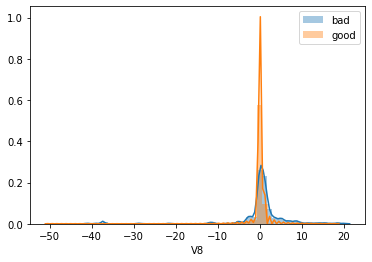

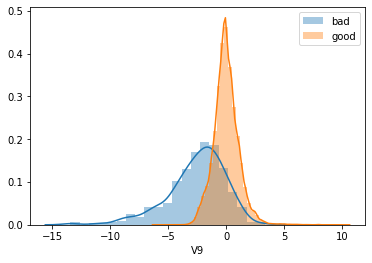

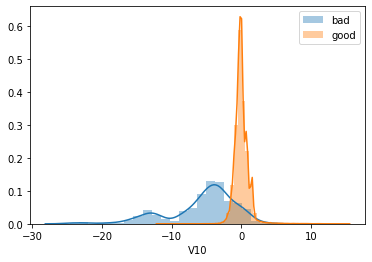

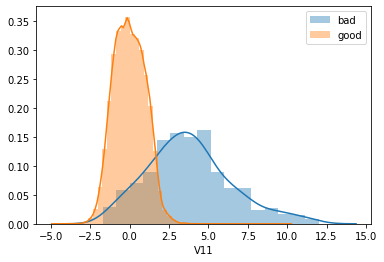

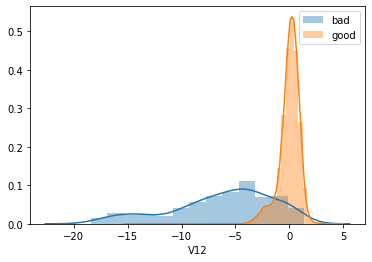

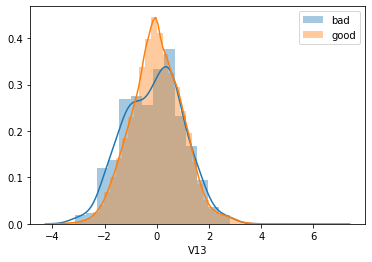

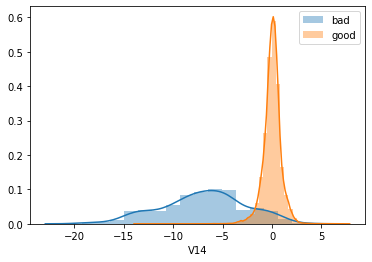

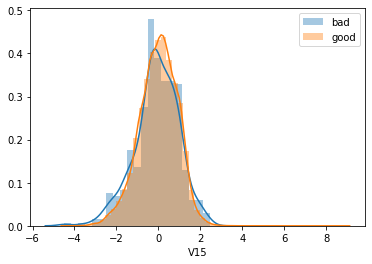

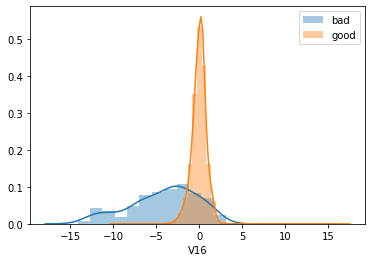

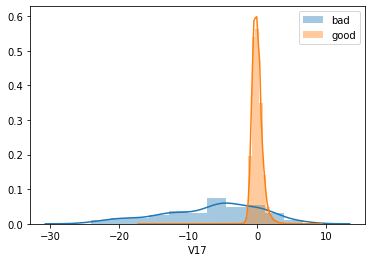

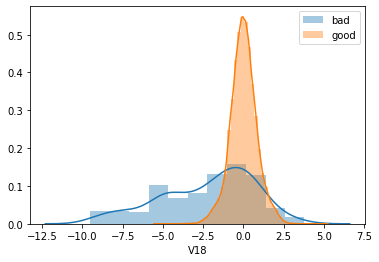

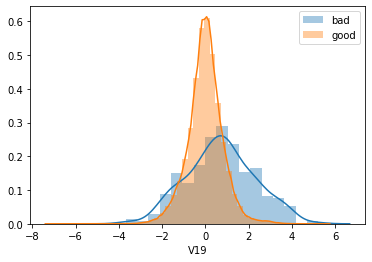

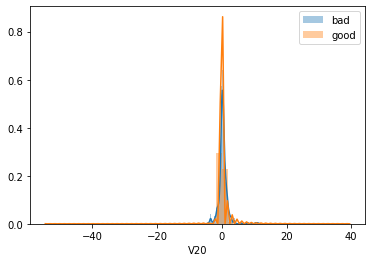

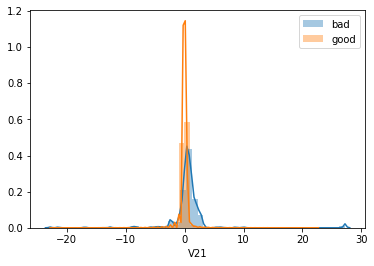

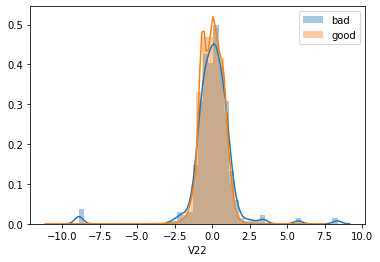

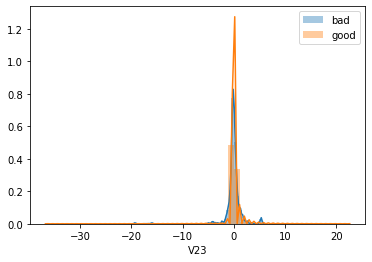

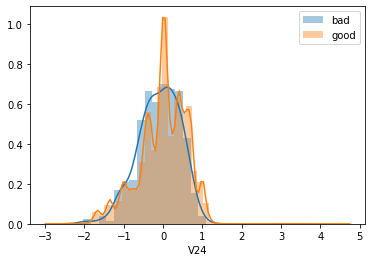

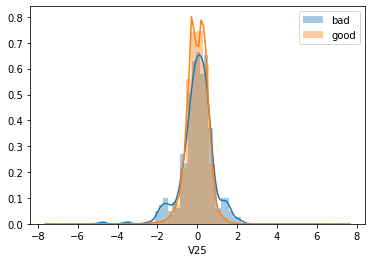

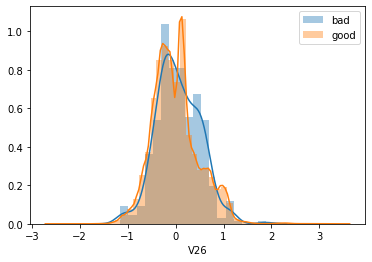

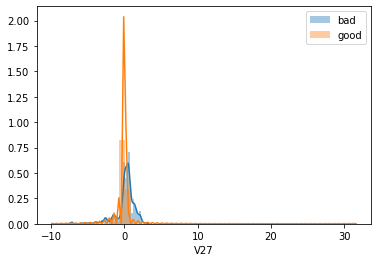

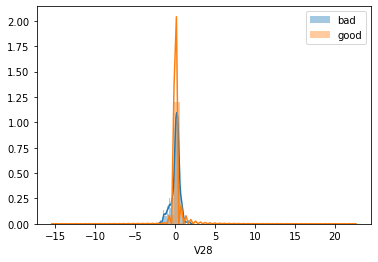

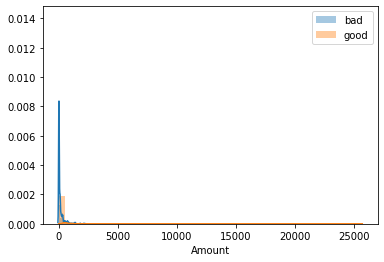

In [17]:

for i in range (data.shape[1]-1):
    plt.subplot()
    sns.distplot(data[data['Class']==1][data.columns[i]],label='bad')
    sns.distplot(data[data['Class']==0][data.columns[i]],label='good')
    plt.legend()
    plt.show()    

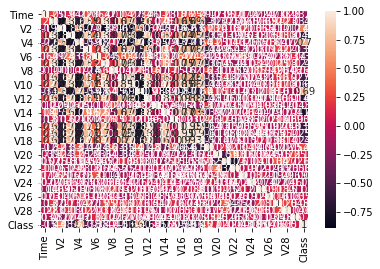

In [18]:
#v5, V8 v13 v15 v20 v22 v23 v24 v25 v26 v27 v28 are not good features. 

# correlation plot

sns.heatmap(data_balanced.corr(), annot=True) # not clear to see. 


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
y=data_balanced['Class']
X_preprocessing=data_balanced.drop(['V5','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28','Class'],axis=1)

In [21]:
#plt.hist(data_balanced['Time'])
#sns.distplot(X['Amount'])

In [22]:
X_preprocessing.head()

,Time,V1,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount
137921,121188,-3.798351,-5.061639,0.591242,-1.677468,-2.073995,-2.681599,-1.134210,2.143585,0.284421,-0.398410,-0.860976,-0.009267,-0.285158,0.601626,0.401471,-0.573747,114.00
97859,76516,1.336810,-1.143439,-0.278230,-1.769765,3.748255,-1.850543,-0.322622,0.623755,-0.099502,-0.749118,-0.493269,2.030367,-0.553513,-0.195044,0.461823,0.405209,48.00
178928,143545,2.058588,-0.101429,-2.251752,0.031135,-0.031314,0.461991,0.296235,0.067699,-0.077728,1.066269,0.486950,-0.296637,-0.785586,0.175468,0.926421,-0.001898,37.05
178549,143354,1.118331,2.074439,-3.837518,5.448060,-1.020509,-1.808574,-2.032638,-2.732792,3.274075,-3.541687,-7.555729,-0.642333,-2.114429,0.183327,-1.177793,0.289861,1.00
81955,68207,-13.192671,12.785971,-9.906650,3.320337,5.760059,-18.750889,-0.391540,-5.052502,4.406806,-4.610756,-9.072711,-6.211557,-6.248145,-3.149247,0.051576,27.202839,1.00


In [23]:
# time, amount need to be normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_preprocessing.values)
features=scaler.transform(X_preprocessing.values)

In [24]:
col=X_preprocessing.columns

X=pd.DataFrame(features, columns=col)
X.head()

,Time,V1,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount
0,0.651010,-0.296874,-1.881403,0.672409,-1.236583,-0.808073,0.002594,0.051864,1.089309,-0.559124,0.588885,0.558174,0.594551,0.502712,0.717863,0.029581,-0.330592,0.011959
1,-0.270377,0.683025,-0.793767,0.526910,-1.265278,2.544339,0.146196,0.401298,0.754139,-0.696160,0.512698,0.637345,1.179205,0.457671,0.387193,0.076231,0.015652,-0.236195
2,1.112136,0.820756,-0.504520,0.196658,-0.705387,0.368089,0.545791,0.667750,0.631511,-0.688388,0.907067,0.848398,0.512177,0.418720,0.540980,0.435348,-0.128336,-0.277366
3,1.108197,0.641334,0.099470,-0.068706,0.978709,-0.201483,0.153448,-0.334960,0.013915,0.507992,-0.093950,-0.883285,0.413085,0.195685,0.544242,-1.191129,-0.025145,-0.412911
4,-0.441755,-2.089512,3.072838,-1.084324,0.317210,3.702722,-2.774100,0.371625,-0.497654,0.912304,-0.326192,-1.209909,-1.183313,-0.498124,-0.838995,-0.240874,9.493630,-0.412911


In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [28]:
logisticregression_model=LogisticRegression()
tree_model = DecisionTreeClassifier()
bagging=BaggingClassifier(n_estimators=100)
forest_model=RandomForestClassifier(n_estimators=100, max_depth=3)
ada_model=AdaBoostClassifier(n_estimators=100)

In [29]:
models=[logisticregression_model, tree_model,bagging,forest_model,ada_model]


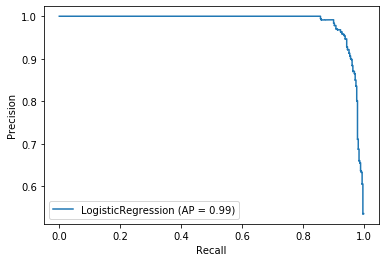

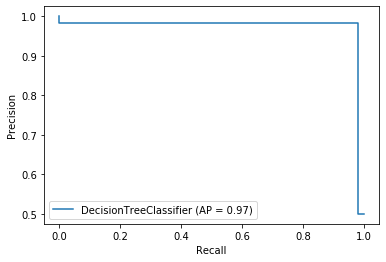

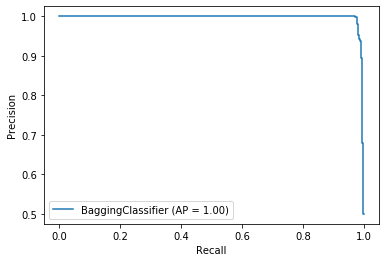

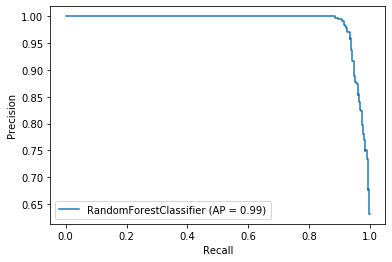

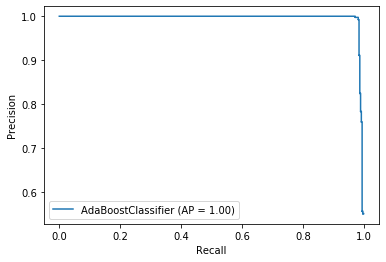

In [30]:
from sklearn.metrics import plot_precision_recall_curve

for model in models:
    model.fit(X_train,y_train)
    plot_precision_recall_curve(model,X,y)

In [31]:
for model in models:
    print(model, '\n', cross_val_score(model,X_train,y_train,cv=5).mean())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 0.9398825146856643
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
 0.9035370578677664
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, rando

In [32]:
for model in models:
    model.fit(X_train,y_train)
    predict_X_test=model.predict(X_test)
    predict=pd.DataFrame(predict_X_test,columns=['col'])
    
    print(model, '\n',classification_report(y_test,predict_X_test), confusion_matrix(predict_X_test,y_test))
    
    print(predict['col'].value_counts(normalize=True))
    print(y_test.value_counts(normalize=True))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        79
           1       1.00      0.87      0.93        79

    accuracy                           0.94       158
   macro avg       0.94      0.94      0.94       158
weighted avg       0.94      0.94      0.94       158
 [[79 10]
 [ 0 69]]
0    0.563291
1    0.436709
Name: col, dtype: float64
1    0.5
0    0.5
Name: Class, dtype: float64
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=Non

In [33]:
lr_test=logisticregression_model.predict(X_test)

In [34]:
y_test.value_counts()

1    79
0    79
Name: Class, dtype: int64

In [35]:
pd.DataFrame(lr_test)[0].value_counts()

0    89
1    69
Name: 0, dtype: int64

In [36]:
test_data=pd.read_csv('ml_problems_12_creditcard_test.csv')

In [37]:
X_submission=test_data.drop(['Id','V5','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'],axis=1)


scaler.fit(X_submission.values)
features2=scaler.transform(X_submission.values)

col2=X_submission.columns

X_submission=pd.DataFrame(features2, columns=col2)
X_submission.head()

,Time,V1,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount
0,-1.993276,0.200690,0.369352,-0.566621,-0.066559,2.487009,0.385618,-0.511606,0.281489,-0.256887,-0.324220,0.375161,-0.146223,-0.937362,0.433799,0.875619,0.061540,-0.322656
1,-1.993213,-0.213023,0.549808,0.598573,-0.513527,-0.100037,0.579429,-0.608198,-0.668531,0.312899,0.274709,-0.302903,1.303959,-1.075304,0.816937,0.033736,-0.266237,-0.359411
2,-1.993192,-2.711938,-3.245192,0.768092,1.225397,-1.328294,-1.273297,1.115553,0.313603,0.892375,0.962572,-0.496809,0.539169,-0.839192,0.093197,-0.499736,-0.679849,-0.173978
3,-1.993150,0.356688,-0.809185,0.666345,0.588630,0.979103,-0.716713,-0.409273,0.516121,0.991950,1.288387,-0.386535,-2.328423,0.602778,0.751636,-1.602386,-0.401231,0.572885
4,-1.993003,0.672716,-0.101454,0.281162,0.406426,-0.628139,-0.215260,-0.976994,0.788176,-0.630474,-0.110962,0.177470,-1.543673,-0.248360,1.523829,-1.528608,-0.386220,-0.298381


In [38]:
y_submission=tree_model.predict(X_submission)

y_submit=pd.DataFrame(y_submission,columns=['Class'])

y_submit.head()

,Class
0,0
1,1
2,0
3,0
4,1


In [39]:
submission_data=pd.concat([test_data['Id'],y_submit],axis=1)
submission_data.reset_index(drop=True)
submission_data['Class'].value_counts(normalize=True)

1    0.783489
0    0.216511
Name: Class, dtype: float64

In [40]:
submission_data.head()

,Id,Class
0,11,0
1,17,1
2,18,0
3,20,0
4,27,1


In [41]:
submission_data.to_csv("submission_cy.csv", index=False)

# Grid search

In [45]:
from sklearn.model_selection import GridSearchCV

# Linear Regression Classifier
lr_params = {"penalty": ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_lr = GridSearchCV(LogisticRegression(), lr_params, scoring='f1')
grid_lr.fit(X_train, y_train.values.ravel())
param_lr = grid_lr.best_estimator_
print(grid_lr.best_params_)

# Decision Tree Classifier
dt_params = {"criterion": ["gini", "entropy"], 
             "max_depth": list(range(2,4,1)), 
             "min_samples_leaf": list(range(5,7,1))}
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='f1')
grid_dt.fit(X_train, y_train)

param_dt = grid_dt.best_estimator_
print(grid_dt.best_params_)

# Random Forest Classifier
rf_params = { 'n_estimators': [200, 500],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, scoring='f1')
grid_rf.fit(X_train, y_train.values.ravel())
param_rf = grid_rf.best_estimator_
print(grid_rf.best_params_)

# Adaboost Classifier
ab_params = { 'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1]}
grid_ab = GridSearchCV(AdaBoostClassifier(), ab_params, scoring='f1')
grid_ab.fit(X_train, y_train.values.ravel())
param_ab = grid_ab.best_estimator_
print(grid_ab.best_params_)


{'C': 10, 'penalty': 'l2'}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 500}
{'learning_rate': 0.3, 'n_estimators': 50}


In [46]:
param_lr_score = cross_val_score(param_lr, X_train, y_train.values.ravel(), cv=5, scoring='f1')
print('Logistic regression cross validation f1 score: ', round(param_lr_score.mean() * 100, 2).astype(str) + '%')

param_dt_score = cross_val_score(param_dt, X_train, y_train.values.ravel(), cv=5, scoring='f1')
print('Decision Tree cross validation f1 score: ', round(param_dt_score.mean() * 100, 2).astype(str) + '%')

param_rf_score = cross_val_score(param_rf,X_train, y_train.values.ravel(), cv=5, scoring='f1')
print('Random Forest cross validation f1 score: ', round(param_rf_score.mean() * 100, 2).astype(str) + '%')

param_ab_score = cross_val_score(param_ab, X_train, y_train.values.ravel(), cv=5, scoring='f1')
print('Adaboost cross validation f1 score: ', round(param_ab_score.mean() * 100, 2).astype(str) + '%')


Logistic regression cross validation f1 score:  93.71%
Decision Tree cross validation f1 score:  92.86%
Random Forest cross validation f1 score:  93.64%
Adaboost cross validation f1 score:  93.75%
